# Load Dataset

In [6]:
import sys
sys.path.append("../")

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
from datasets import load_dataset

filename = "../data/news-docs.2020.processed.csv"
dataset = load_dataset('csv', data_files=filename, column_names=["date", "sentenceSplit", "unsplit"])

Using custom data configuration default-a631fcd5c80eb05a
Reusing dataset csv (/home/sri/.cache/huggingface/datasets/csv/default-a631fcd5c80eb05a/0.0.0/2dc6629a9ff6b5697d82c25b73731dd440507a69cbce8b425db50b751e8fcfd0)


In [16]:
n = 100
sample_articles_list = [dataset['train'][i]['sentenceSplit'] for i in range(1, n)]

In [11]:
text = "A fully differential calculation in perturbative quantum chromodynamics is presented for the production of massive photon pairs at hadron colliders. All next-to-leading order perturbative contributions from quark-antiquark, gluon-(anti)quark, and gluon-gluon subprocesses are included, as well as all-orders resummation of initial-state gluon radiation valid at next-to-next-to-leading logarithmic accuracy. The region of phase space is specified in which the calculation is most reliable. Good agreement is demonstrated with data from the Fermilab Tevatron, and predictions are made for more detailed tests with CDF and DO data. Predictions are shown for distributions of diphoton pairs produced at the energy of the Large Hadron Collider (LHC). Distributions of the diphoton pairs from the decay of a Higgs boson are contrasted with those produced from QCD processes at the LHC, showing that enhanced sensitivity to the signal can be obtained with judicious selection of events."
sample_articles_list = [text]

# Top K Experiment
+ Run the Gpt text generation on the dataset and observe at each timestep where the words are ranked on top k by the GPT model using their probabilites.

## More granularly
+ Transform the dataset into articles and use the passage of articles as model input.
+ Using the GPT model predict the next probable token at each timestep in the input sequence.
+ At each time-step, rank the predicted token based on the generated probability.
+ for each prediction at each timestep, compare where the original token is present in the ranked predicted token list. 

In [9]:
from src.insights import topk_insight

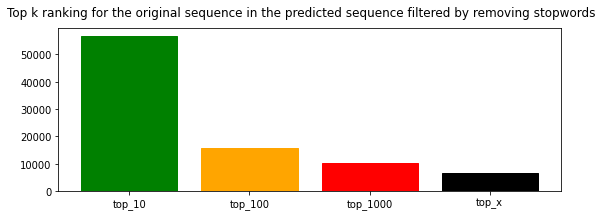

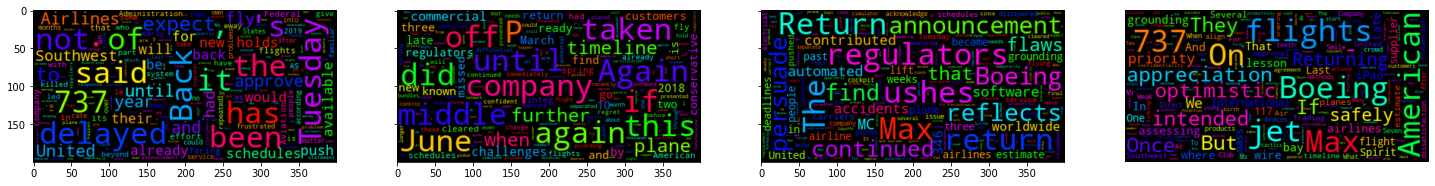

In [20]:
topk_insight.analyse_text(sample_articles_list, filters=None)

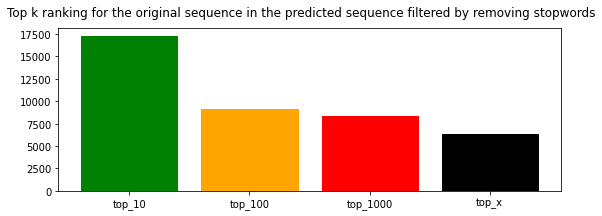

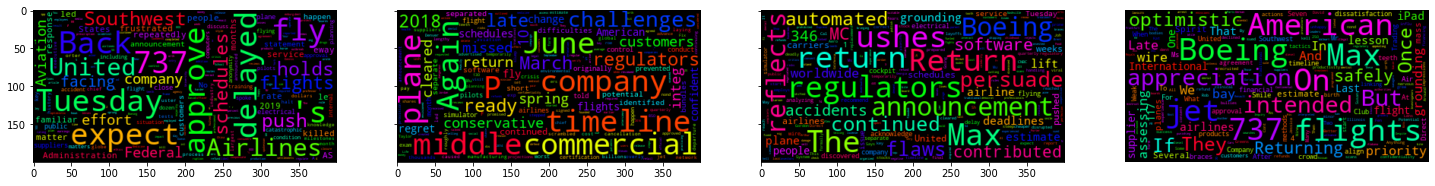

In [21]:
topk_insight.analyse_text(sample_articles_list, filters="stopwords")

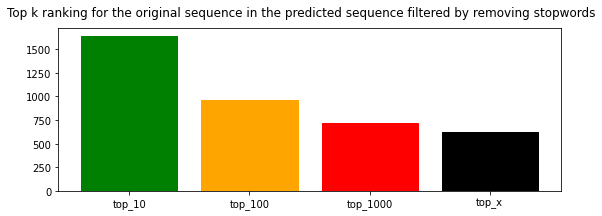

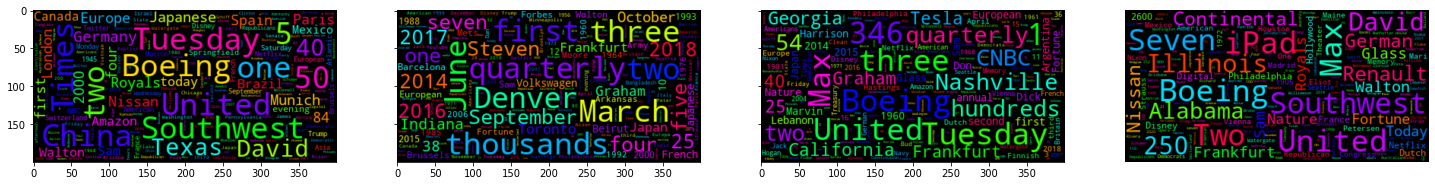

In [22]:
topk_insight.analyse_text(sample_articles_list, filters="ents")

In [23]:
# for tokens which didn't come to top_10, analyse how confident is the model predicting it's next word.

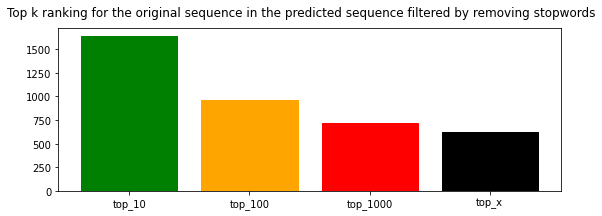

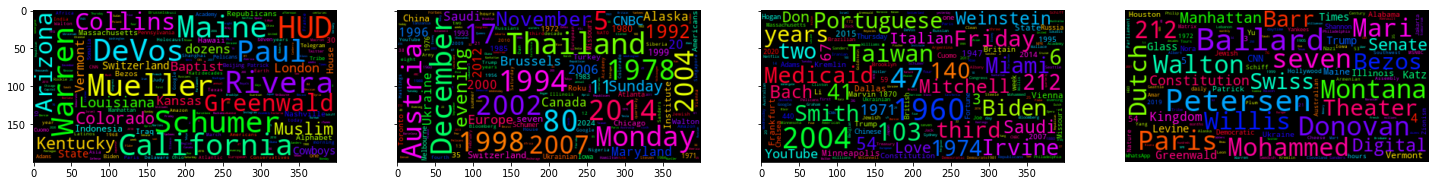

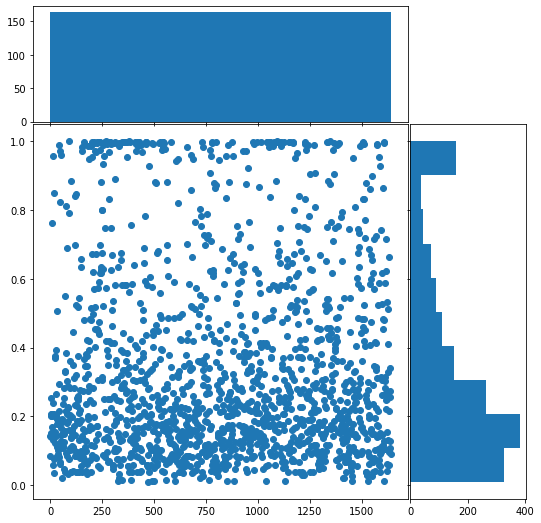

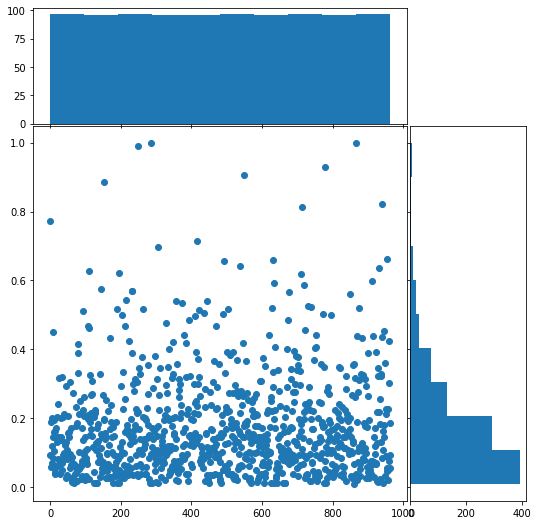

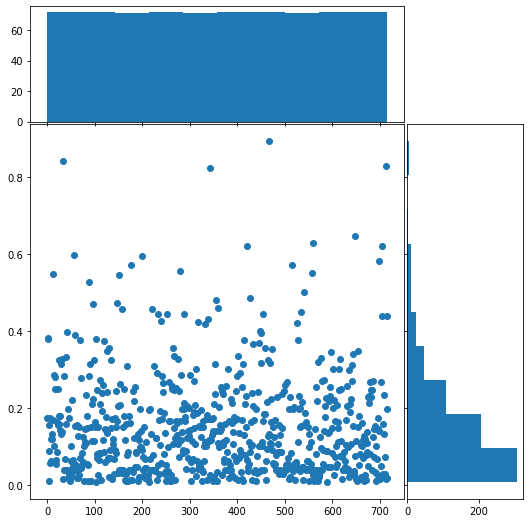

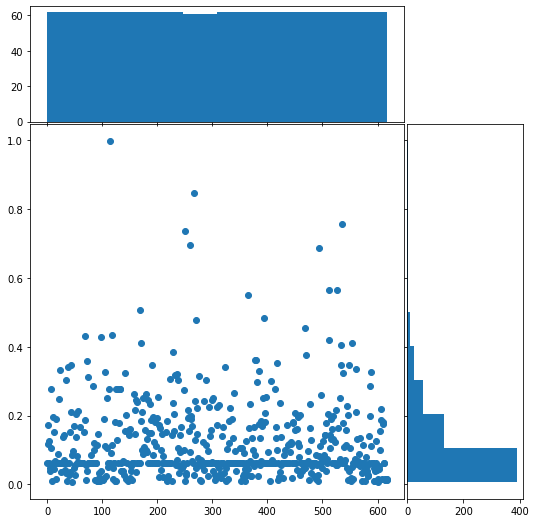

In [29]:
topk_insight.analyse_text(sample_articles_list, filters="ents", probs_plot=True)